<a href="https://colab.research.google.com/github/joaochenriques/FluidMechanics2/blob/main/Laboratory/ClauserChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as mpl
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker

import pathlib, sys
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py &> /dev/null

import mpl_utils as mut
mut.config_plots()

%config InlineBackend.figure_formats = ['svg']

ε = 1E-6

In the log-law region, the velocity profile is described by the following function:

$$\frac{u(y)}{u_{\tau}}=\frac{1}{\kappa} \ln \left(\frac{u_{\tau} y}{\nu}\right)+A,$$

where $\kappa=0.41$ is assumed to be a universal constant and and $A=5.2$ for hydrodynamically smooth surfaces. If we multiply the log-law by $u_{\tau} / U_\text{e}$, we obtain:

$$\frac{u(y)}{U_\text{e}}=\left(\frac{1}{\kappa} \frac{u_{\tau}}{U_\text{e}}\right) \ln \left(\frac{U_\text{e} y}{\nu}\right)+\left(\frac{1}{\kappa} \frac{u_{\tau}}{U_\text{e}} \ln \left(\frac{u_{\tau}}{U_\text{e}}\right)+A \frac{u_{\tau}}{U_\text{e}}\right)$$


The friction coefficient can be written as a function $u_\tau$ as 

$$C_{\text{f}} = 2\left(\frac{u_{\tau}}{U_\text{e}}\right)^{\!2},$$

thus giving 

$$\frac{u(y)}{U_\text{e}} = {\left(\frac{1}{\kappa} \sqrt{\frac{C_{\text{f}}}{2}}\right) \ln \left(\text{Re}_y\right)} + B,$$
where 

$$\text{Re}_y = \frac{U_\text{e}y}{\nu},$$

and

$$B = \left(\frac{1}{\kappa} \sqrt{\frac{C_{\text{f}}}{2}} \ln \left(\sqrt{\frac{C_{\text{f}}}{2}}\right)+A \sqrt{\frac{C_{\text{f}}}{2}}\right).$$

In [2]:
def logFormater(x, pos):
    k = int( x/10**int(np.log10(x)) )
    if k == 1:
      return r'$10^%i$' % int(np.log10(x))
    else:
      return r'$^{%i}$' % k 

formatter = ticker.FuncFormatter(logFormater)

## Plot with experimental data

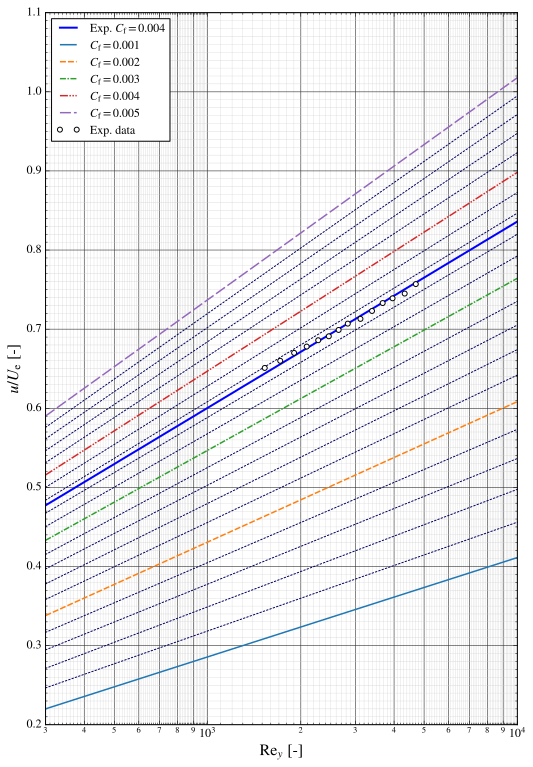

In [14]:
# experimental points
Re_y_data = [ 1529.81, 1716.37, 1902.94, 2089.50, 2276.06, 2462.62, 2649.18, 2835.75, 3115.59, 3395.43, 3675.28, 3955.1, 4328.25, 4701.37 ]
u_Ue_data = [ 0.651, 0.660, 0.670, 0.678, 0.686, 0.691, 0.699, 0.707, 0.713, 0.723, 0.733, 0.739, 0.745, 0.757 ]

# adjust the Cf to your data
Cf_exp = 0.00352

# Plotting!
κ = 0.41
A = 5.2

Cf_vec = np.linspace( 0.001, 0.005, 21)
Rey_vec = np.array( (3E2, 1E4 ) )

mpl.figure( 1, figsize=(8,12) )

# experimental Cf curve
sCf2 = np.sqrt( Cf_exp / 2.0 )
B = ( sCf2 / κ ) * np.log( sCf2 ) + A * sCf2
u_Ue = ( sCf2 / κ ) * np.log( Rey_vec ) + B 
mpl.semilogx( Rey_vec, u_Ue, 'b-', lw=2, label='Exp. $C_\mathrm{f}=%.3f$' % Cf_exp )

# other Cf lines
for i, Cf in enumerate( Cf_vec ):
    sCf2 = np.sqrt( Cf / 2.0 )
    B = ( sCf2 / κ ) * np.log( sCf2 ) + A * sCf2
    u_Ue = ( sCf2 / κ ) * np.log( Rey_vec ) + B 

    if i % 5 == 0:
      mpl.semilogx( Rey_vec, u_Ue, label='$C_\mathrm{f}=%.3f$' % Cf )
    else:
      mpl.semilogx( Rey_vec, u_Ue, '-', dashes=[1.5,2], color='#000060', lw = 1, dash_capstyle='round' )

mpl.semilogx( Re_y_data, u_Ue_data, 'wo', markeredgewidth=1, label='Exp. data' )

mpl.xlim( Rey_vec[0], Rey_vec[-1] )
mpl.gca().xaxis.set_minor_locator( ticker.LogLocator(base=10, subs=range(100)))
mpl.gca().xaxis.set_minor_formatter( ticker.NullFormatter() )

mpl.gca().set_axisbelow(True)

kk = np.array( (100,1000) )
ii = np.linspace( 2, 10, 9 )
ticks = [kk[0]]
for k in kk: ticks.extend( ii*k )
mpl.gca().xaxis.set_major_locator( ticker.FixedLocator(ticks) )
mpl.gca().xaxis.set_major_formatter(formatter)

mpl.gca().yaxis.set_minor_locator( ticker.MultipleLocator(0.01) )
mpl.gca().yaxis.set_major_locator( ticker.MultipleLocator(0.1) )

mpl.gca().tick_params(axis='both', which='major', labelsize=12)
mpl.legend( loc='upper left', fontsize=12 )

mpl.grid(which='major', color='0.20', linestyle='-', linewidth=0.6 )
mpl.grid(which='minor', color='0.80', linestyle='-', linewidth=0.3 )

mpl.xlabel( '$\mathrm{Re}_y$ [-]' )
mpl.ylabel( '$u / U_\mathrm{e}$ [-]' )

mpl.savefig( 'FIG_AbacoClauserExp.pdf', bbox_inches='tight', pad_inches=0.02 );

## Plot without experimental data

In [ ]:
κ = 0.41
A = 5.2

Cf_vec = np.linspace( 0.001, 0.005, 21)
Rey_vec = np.array( (3E2, 1E4 ) )

mpl.figure( 1, figsize=(8,12) )

for i, Cf in enumerate( Cf_vec ):
    sCf2 = np.sqrt( Cf / 2.0 )
    B = ( sCf2 / κ ) * np.log( sCf2 ) + A * sCf2
    u_Ue = ( sCf2 / κ ) * np.log( Rey_vec ) + B 

    if i % 5 == 0:
      mpl.semilogx( Rey_vec, u_Ue, label='$C_\mathrm{f}=%.3f$' % Cf )
    else:
      mpl.semilogx( Rey_vec, u_Ue, '-', dashes=[1.5,2], color='#000060', lw = 1, dash_capstyle='round' )

mpl.xlim( Rey_vec[0], Rey_vec[-1] )
mpl.gca().xaxis.set_minor_locator( ticker.LogLocator(base=10, subs=range(100)))
mpl.gca().xaxis.set_minor_formatter( ticker.NullFormatter() )

mpl.gca().set_axisbelow(True)

kk = np.array( (100,1000) )
ii = np.linspace( 2, 10, 9 )
ticks = [kk[0]]
for k in kk: ticks.extend( ii*k )
mpl.gca().xaxis.set_major_locator( ticker.FixedLocator(ticks) )
mpl.gca().xaxis.set_major_formatter(formatter)

mpl.gca().yaxis.set_minor_locator( ticker.MultipleLocator(0.01) )
mpl.gca().yaxis.set_major_locator( ticker.MultipleLocator(0.1) )

mpl.gca().tick_params(axis='both', which='major', labelsize=12)
mpl.legend( loc='upper left', fontsize=12 )

mpl.grid(which='major', color='0.20', linestyle='-', linewidth=0.6 )
mpl.grid(which='minor', color='0.80', linestyle='-', linewidth=0.3 )

mpl.xlabel( '$\mathrm{Re}_y$ [-]' )
mpl.ylabel( '$u / U_\mathrm{e}$ [-]' )

mpl.savefig( 'FIG_AbacoClauser.pdf', bbox_inches='tight', pad_inches=0.02 );